# Real and Fake Face detection


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
import keras.utils as image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

# Dataset


In [3]:
nbatch = 128
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/jehad/Downloads/archive/real_vs_fake/real-vs-fake/train',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/jehad/Downloads/archive/real_vs_fake/real-vs-fake/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

valid_generator = test_datagen.flow_from_directory('C:/Users/jehad/Downloads/archive/real_vs_fake/real-vs-fake/valid',
                                                   target_size=(128,128),
                                                   batch_size=nbatch,
                                                   class_mode='binary')




Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


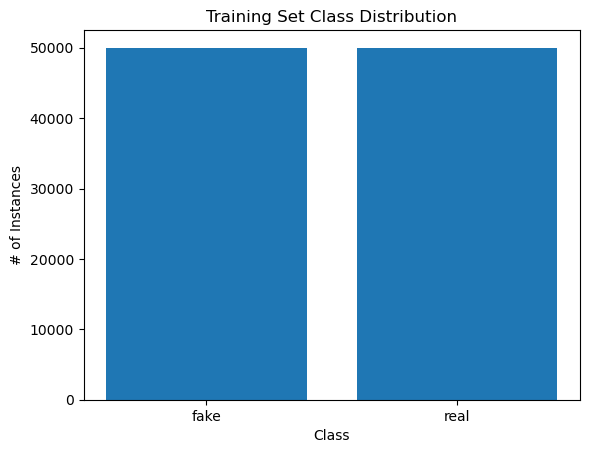

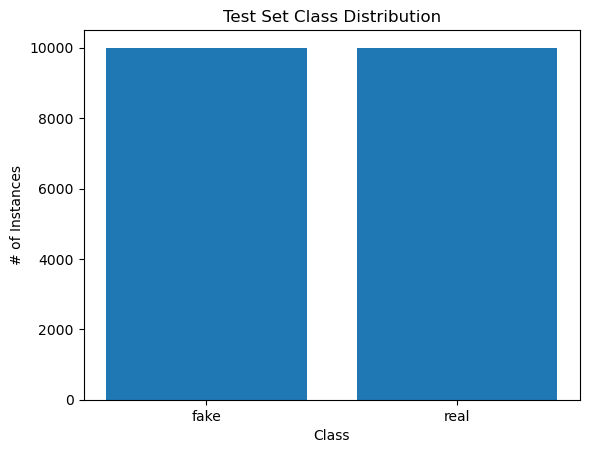

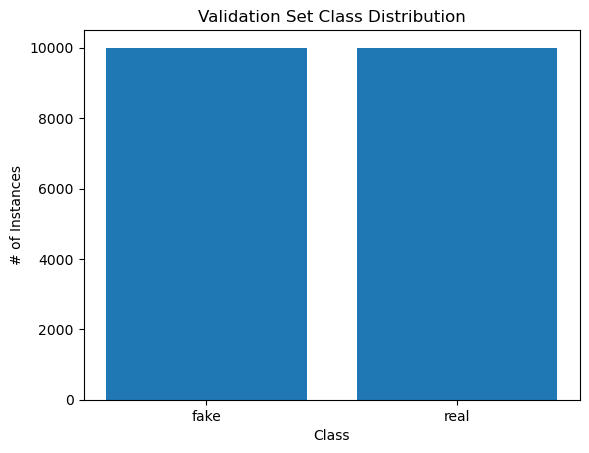

In [28]:
import matplotlib.pyplot as plt

def plot_class_distribution(dataset, title):
    class_labels = dataset.classes
    num_classes = len(dataset.class_indices)
    class_counts = [len(class_labels[class_labels == i]) for i in range(num_classes)]
    class_names = list(dataset.class_indices.keys())

    plt.bar(class_names, class_counts)
    plt.xlabel('Class')
    plt.ylabel('# of Instances')
    plt.title(title)
    plt.show()

# Plot class distribution for the training set
plot_class_distribution(training_set, 'Training Set Class Distribution')

# Plot class distribution for the test set
plot_class_distribution(test_set, 'Test Set Class Distribution')

# Plot class distribution for the validation set
plot_class_distribution(valid_generator, 'Validation Set Class Distribution')


(128, 128, 128, 3) (128,)


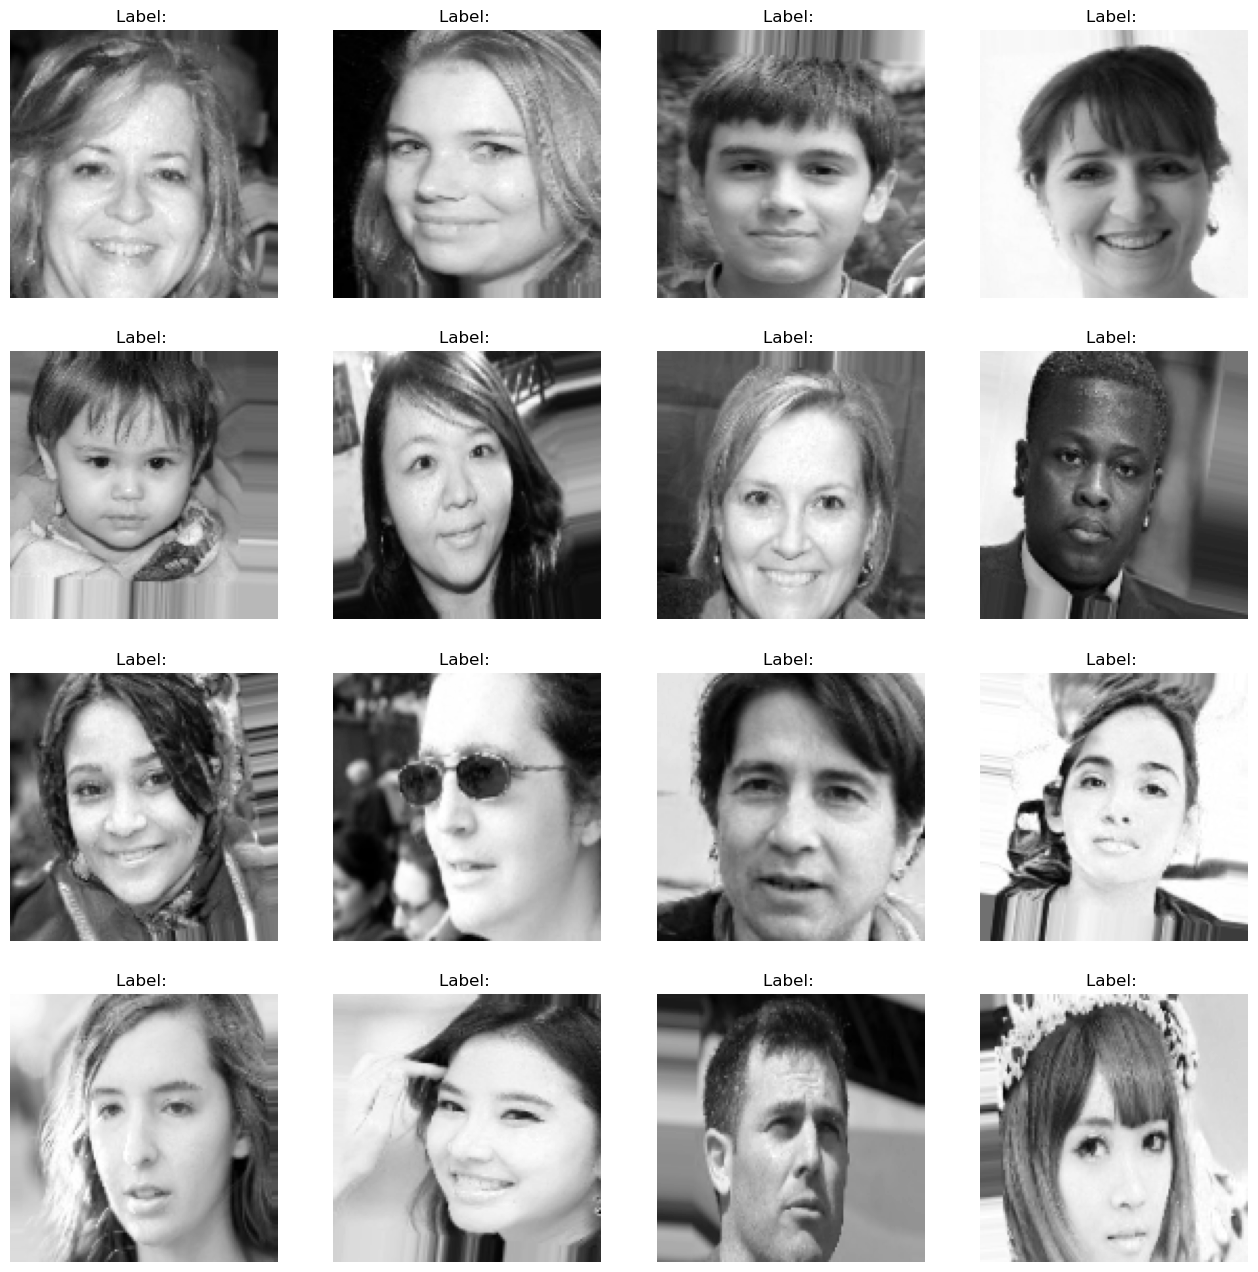

In [5]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Label: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

# Convolutional Neural Net
CNN model 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128, 128, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))

model.add(Dense(256, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)     

##### Compile the model

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
Finally we will train our model using some keras helper functions. We are not doing any hyper-parameter optimization so we will not define a separate testing and validation set. We can however evaluate our model further in real time within the application.

In [12]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_loss', save_best_only=True, mode='max'),
]

In [13]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=40,
        epochs=75,
        validation_data=test_set,
        validation_steps=28,
        callbacks = callbacks_list
    )

C:\Users\jehad\AppData\Local\Temp\ipykernel_28208\565605914.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/75
40/40 [==============================] - 54s 1s/step - loss: 0.6950 - accuracy: 0.5047 - val_loss: 0.6921 - val_accuracy: 0.5645
Epoch 2/75
40/40 [==============================] - 45s 1s/step - loss: 0.6929 - accuracy: 0.5184 - val_loss: 0.6932 - val_accuracy: 0.4888
Epoch 3/75
40/40 [==============================] - 45s 1s/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6929 - val_accuracy: 0.5388
Epoch 4/75
40/40 [==============================] - 46s 1s/step - loss: 0.6933 - accuracy: 0.4941 - val_loss: 0.6927 - val_accuracy: 0.5039
Epoch 5/75
40/40 [==============================] - 45s 1s/step - loss: 0.6933 - accuracy: 0.5004 - val_loss: 0.6922 - val_accuracy: 0.5407
Epoch 6/75
40/40 [==============================] - 46s 1s/step - loss: 0.6879 - accuracy: 0.5414 - val_loss: 0.6699 - val_accuracy: 0.5935
Epoch 7/75
40/40 [==============================] - 45s 1s/step - loss: 0.6780 - accuracy: 0.5662 - val_loss: 0.6694 - val_accuracy: 0.5949
Epoch 8/75
40/40 [==

In [14]:
training_set.class_indices

{'fake': 0, 'real': 1}

Text(0.5, 0, '# of epochs')

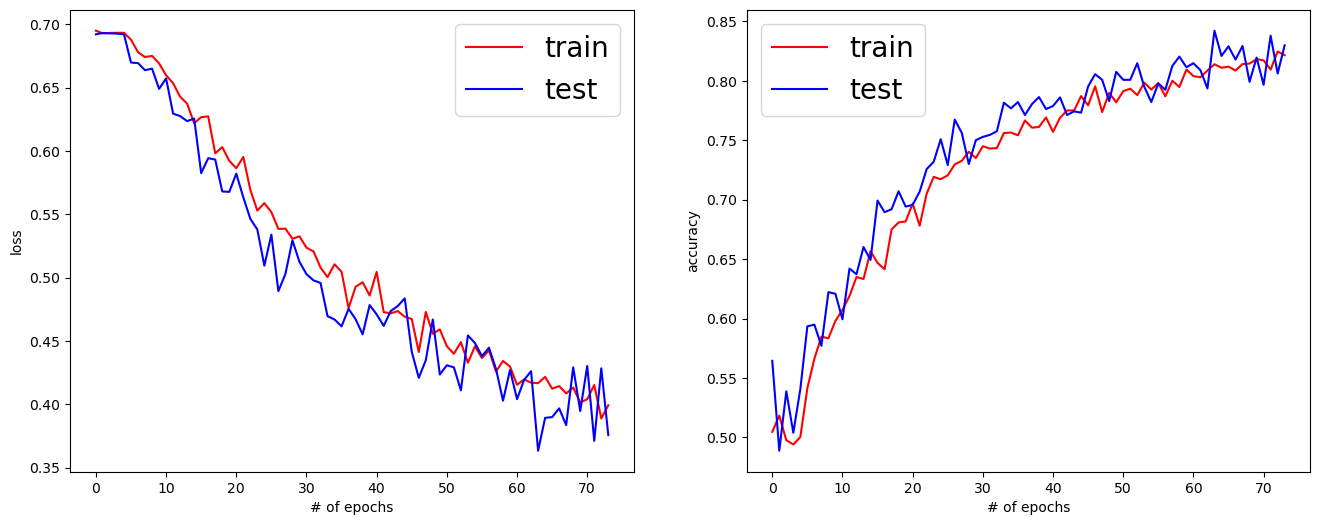

In [15]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

# Prediction
Now the model is trained so I used some real images and edited that image so that we can analysis model is working correcly or not.

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size=(128, 128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    if result[0][0] > 0.5:
        prediction = 'Real'
    else:
        prediction = 'Fake'
    print('Prediction:', prediction)


## Result


Enter Location of Image to predict:  D:/archive/real_and_fake_face_detection/real_and_fake_face/training_real/real_00002.jpg


1/1 [==============================] - 0s 118ms/step
Prediction: Real


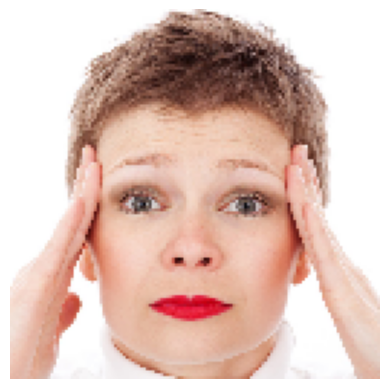

In [17]:
img = input("Enter Location of Image to predict: ")
test_image_1 = ImagePrediction(img)

Enter Location of Image to predict:  D:/archive/real_and_fake_face/training_fake/easy_3_1100.jpg


1/1 [==============================] - 0s 31ms/step
Prediction: Fake


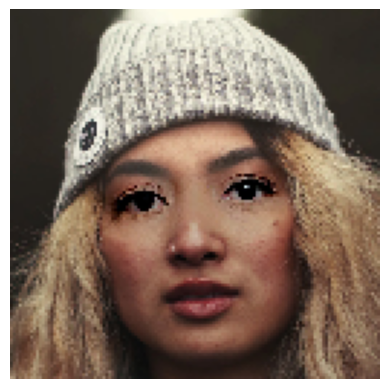

In [26]:
img = input("Enter Location of Image to predict: ")
test_image_1 = ImagePrediction(img)

Enter Location of Image to predict:  C:/Users/jehad/Downloads/archive/real_vs_fake/real-vs-fake/valid/fake/ZE0HJH2W3Q.jpg


1/1 [==============================] - 0s 16ms/step
Prediction: Fake


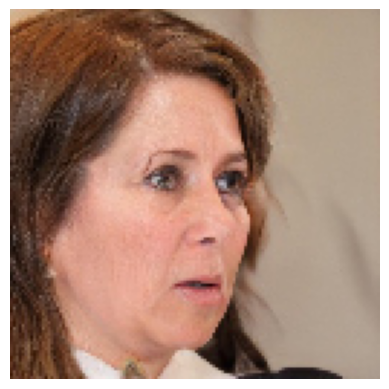

In [31]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict:  C:/Users/jehad/Downloads/archive/real_vs_fake/real-vs-fake/valid/real/67726.jpg


1/1 [==============================] - 0s 16ms/step
Prediction: Real


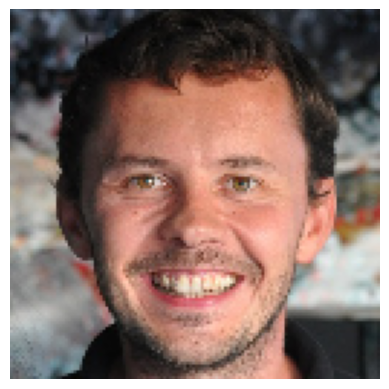

In [32]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict:  D:/archive/real_and_fake_face_detection/real_and_fake_face/training_real/real_00017.jpg


1/1 [==============================] - 0s 16ms/step
Prediction: Real


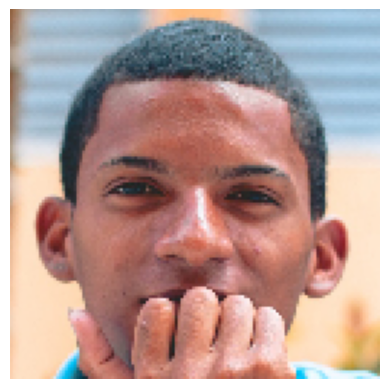

In [20]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict:  D:/archive/real_and_fake_face_detection/real_and_fake_face/training_fake/easy_2_1111.jpg


1/1 [==============================] - 0s 31ms/step
Prediction: Fake


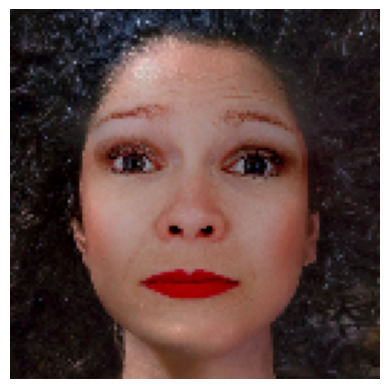

In [19]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict:  D:/image/ZLYK5M1NIB.jpg


1/1 [==============================] - 0s 16ms/step
Prediction: Fake


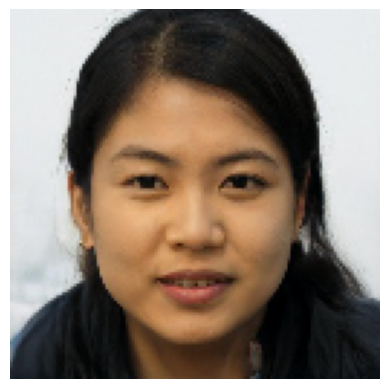

In [21]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict:  D:/image/real_00028.jpg


1/1 [==============================] - 0s 16ms/step
Prediction: Real


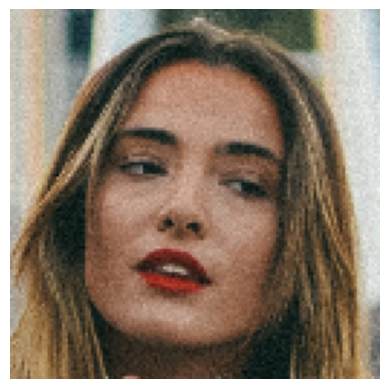

In [22]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict:  D:/image/WhatsApp Image 2023-06-22 at 12.35.45 PM.jpeg


1/1 [==============================] - 0s 16ms/step
Prediction: Real


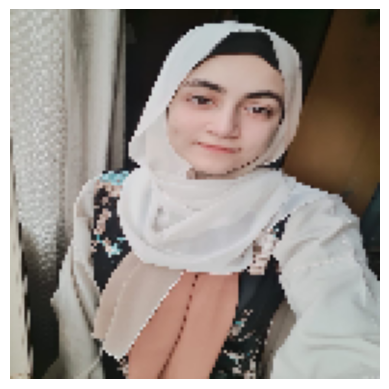

In [23]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)